# Esercizi 10 - Simulated annealing e calcolo parallelo

## 10.1 - Simulated annealing

Per l'implementazione del simulated annealing ho riadattato i codici già scritti per le esercitazioni precedenti, la parte genetica l'ho recuperato dall'esercitazione 9, quella del simulated annealing dalla lezione 8. 

Per quanto riguarda l'algoritmo genetico, ho riutilizzato soltanto la parte relativa a un cromosoma, dal momento che in questo caso non c'è una popolazione che si riproduce (quindi non c'è né crossover né selezone). Per quanto riguarda il simulated annealing, la differenza principale rispetto all'esercizio 8 consiste nel fatto che in questo caso, a $\beta$ fissato, non vengono proposti due parametri reali ($\mu$ e $\sigma$ della funzione d'onda variazionale) estratti secondo una certa distribuzione di probablità, bensì viene proposto un nuovo cromosoma che è stato ottenuto dal precedente utilizzando degli operatori di mutazione. Il cromosoma di prova viene ottenuta applicando un solo operatore di mutazione scelto a caso (ciascuno ha la stessa probabilità di essere applicato). 

Per quanto riguarda la probabilità di accettazione, invece, ho considerato come "energia" del peso di Boltzmann la differenza tra la lunghezza del nuovo percorso e quella dell'ultimo percorso accettato, ossia: $\alpha=min(1,\frac{e^{-\beta L_{new}}}{e^{-\beta L_{old}}})=min(1,e^{-\beta(L_{new}-L_{old})})$. Se la lunghezza corrispondente al nuovo cromosoma è minore rispetto a quella del cromosoma vecchio, allora viene sempre accettato il nuovo cromosoma, altrimenti viene accetato con probabilità pari al peso di Boltzmann.


Infine, rispetto all'esercitazione 8, ho cambiato il modo di abbassare la temperatura. Invece di aumentare $\beta$ linearmente, l'ho fatto crescere esponenzialmente, ossia $\beta_{i+1}=\beta_{i}\times c$, dove $c>1$ è un parametro che regola la crescita esponenziale di $\beta$ (e quindi la decrescita esponenziale della temperatura). Questo è sicuramente un modo più intelligente per regolare la temperatura: all'inizio ci si può permettere di cambiare velocemente la temperatura, ma man mano che ci si avvicina a temperatura zero biosgna farlo sempre più lentamente (in realtà anche aumentando $\beta$ linearmente i salti di temperatura diventano sempre più piccoli, ma non decadono esponenzialmente).

### Città su una circonferenza

Ho considerato un cromosoma di $31$ geni (la prima città l'ho considerata fissata) disposte lunga una circonferenza di raggio $R=10$. Come valore inziale per $\beta$ ho scelta $\beta_0=0.005$ ($T_0=200$), come coefficiente moltiplicativo $c=1.1$ e ho considerato $200$ temperature diverse. Ad ogni temperatura ho considerato $10000$ proposte di nuovi cromosomi.

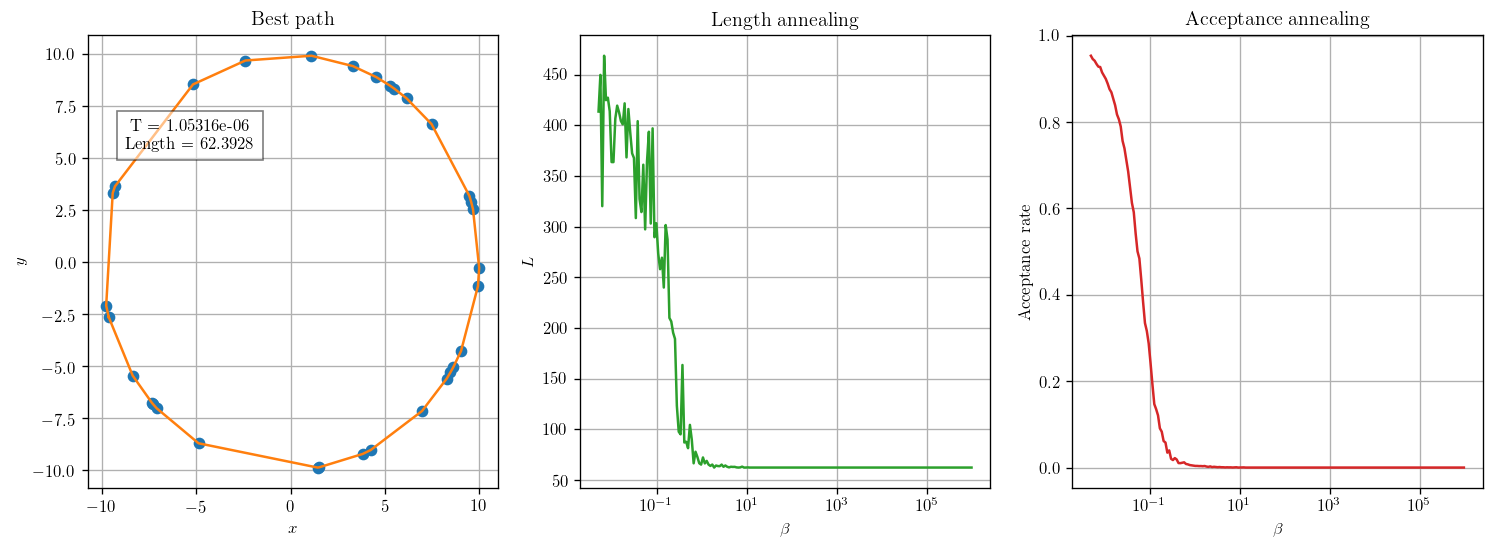

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

beta, temp, length, acceptance = np.loadtxt("Ex_10_1/Cycle/annealing.out", skiprows=1, delimiter=",",dtype="float,float,float,float", unpack=True)
path_annealing=np.loadtxt("Ex_10_1/Cycle/fittest.out", delimiter=", ", dtype="int")

x,y=np.loadtxt("Ex_10_1/Cycle/coordinates.out", delimiter=",",unpack=True)

path_x=[ x[i] for i in path_annealing[-1]] 
path_y=[ y[i] for i in path_annealing[-1]] 


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5),dpi=120)

ax1.plot(x,y,marker="o",linestyle="none")
ax1.plot(path_x,path_y)
ax1.set_title("Best path")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.grid()

ax2.plot(beta, length, color="C2")
ax2.set_title("Length annealing")
ax2.set_xlabel(r"$\beta$")
ax2.set_xscale("log")
ax2.set_ylabel(r"$L$")
ax2.grid()

ax3.plot(beta, acceptance, color="C3")
ax3.set_title("Acceptance annealing")
ax3.set_xlabel(r"$\beta$")
ax3.set_xscale("log")
ax3.set_ylabel(r"Acceptance rate")
ax3.grid()

text_box = ax1.text(0.25, 0.75, "", bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 5}, transform=ax1.transAxes, ha="center", fontfamily="serif")
text_box.set_text("T = " + str(temp[-1])+ "\n Length = "+str(length[-1]))

plt.show()


Troviamo ovviamente la soluzione attesa per quanto riguarda il percorso migliore. L'evoluzione della lunghezza corrispondente al cromosoma ottenuto alla fine di ogni loop a $\beta$ fissato e l'acceptance rate sono graficati con $\beta$ in scala logaritmica. Il sistema "congela" nello stato di minima lunghezza a circa $\beta=10$. L'accettanza, come atteso, è molto alta per valori di $\beta$ piccolo mentre diminuisce fino a diventare nulla a basse temperature (se la temperatura è abbastanza bassa, la probabilità di accettare uno stato di lunghezza maggiore tende a 0).

### Città in un quadrato

Ho quindi considerato il caso di $32$ città disposte casualmente in un quadrato di lato $10$, utilizzando gli stessi parametri.

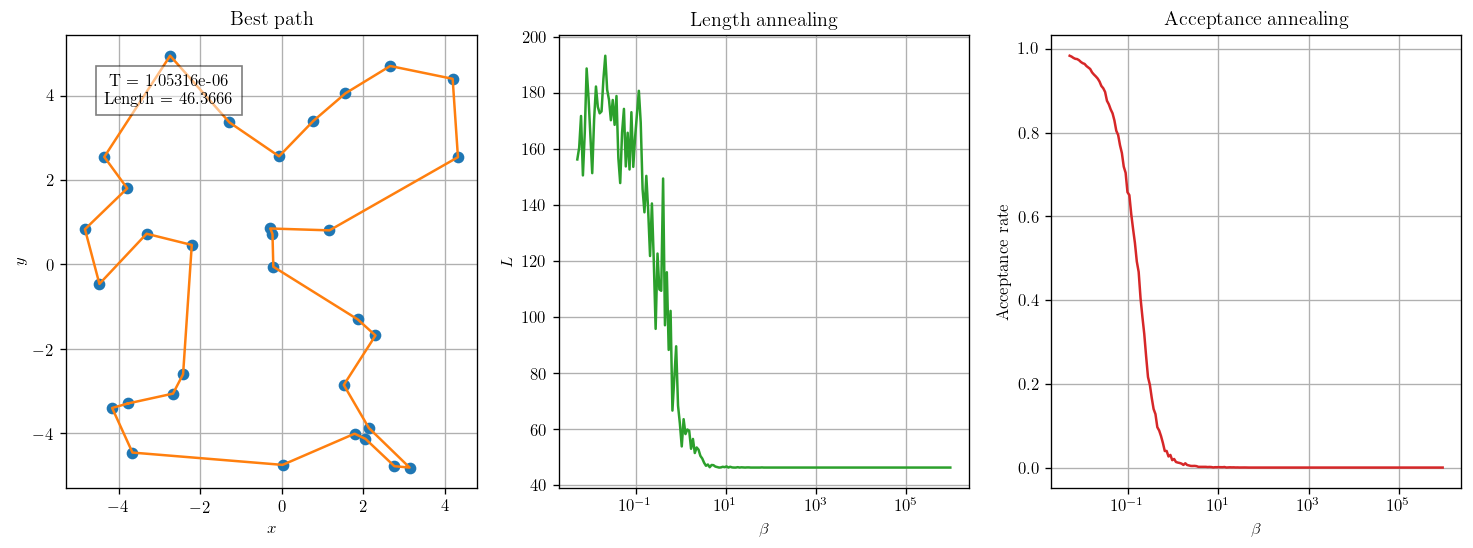

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

beta, temp, length, acceptance = np.loadtxt("Ex_10_1/Square/annealing.out", skiprows=1, delimiter=",",dtype="float,float,float,float", unpack=True)
path_annealing=np.loadtxt("Ex_10_1/Square/fittest.out", delimiter=", ", dtype="int")

x,y=np.loadtxt("Ex_10_1/Square/coordinates.out", delimiter=",",unpack=True)

path_x=[ x[i] for i in path_annealing[-1]] 
path_y=[ y[i] for i in path_annealing[-1]] 


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5),dpi=120)

ax1.plot(x,y,marker="o",linestyle="none", animated=True)
ln1,=ax1.plot(path_x,path_y)
ax1.set_title("Best path")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.grid()

ln2,=ax2.plot(beta, length, color="C2",animated=True)
ax2.set_title("Length annealing")
ax2.set_xlabel(r"$\beta$")
ax2.set_xscale("log")
ax2.set_ylabel(r"$L$")
ax2.grid()

ln3,=ax3.plot(beta, acceptance, color="C3",animated=True)
ax3.set_title("Acceptance annealing")
ax3.set_xlabel(r"$\beta$")
ax3.set_xscale("log")
ax3.set_ylabel(r"Acceptance rate")
ax3.grid()

text_box = ax1.text(0.25, 0.85, "", bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 5}, transform=ax1.transAxes, ha="center", fontfamily="serif")
text_box.set_text("T = " + str(temp[-1])+ "\n Length = "+str(length[-1]))

plt.show()


Non si notano differenze significative nella convergenza rispetto al caso delle città disposte su una circonferenza.
Anche in questo caso abbiamo ritrovato la stessa soluzione trovata con l'algoritmo genetico. Questo non era scontato e in generale non è detto che accada: non è garantito che questi algoritmi portino alla soluzione ottimale, essi portano soltanto a una "buona" soluzione (anche se ovviamente in questo caso viene il sospetto che sia proprio la soluzione ottimale). In questo caso, il sistema potrebbe "congelarsi" in uno stato metastabile se, ad esempio, la temperatura non viene abbassata abbastanza lentamente. 

Riporto anche un'animazione che mostra il raffreddamento del sistema per i primi $150$ valori di temperatura (ho escluso gli ultimi dove il sistema è congelato).

In [24]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
    
path_x=[ x[i] for i in path_annealing[0]] 
path_y=[ y[i] for i in path_annealing[0]] 

ln1.set_data(path_x, path_y)
ln2.set_data(beta[:0], length[:0])        
ln3.set_data(beta[:0], acceptance[:0])        

def update(t):
    
    path_x=[ x[i] for i in path_annealing[t]] 
    path_y=[ y[i] for i in path_annealing[t]] 

    ln1.set_data(path_x, path_y)
    ln2.set_data(beta[:t], length[:t])        
    ln3.set_data(beta[:t], acceptance[:t])        

    text_box.set_text("T = " + str(temp[t])+ "\n Length = "+str(length[t]))

    return ln1, ln2, text_box

ani = FuncAnimation(fig, update, frames=np.arange(0,150,5),
                     repeat=False, interval=120)
#plt.rcParams['animation.embed_limit'] = 2**128 #limite alla dimensione dell'animazione
#plt.rcParams["animation.html"] = "jshtml"
#ani
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())


## 10.2 - Programmazione parallela

Ho parallelizzato l'algoritmo genetico nel seguente modo.
* Il nodo 0 inizializza tutte le variabili in gioco e con una broadcast le comunica a tutti gli altri nodi. Ogni nodo inizializza il suo generatore di numeri casuali con una coppia di numeri primi diversa.
* A questo punto ogni nodo (continente) crea la sua popolazione che evolve indipendentemente dalle altre.
* Dopo un numero $N_{migr}$ di generazioni, utilizzando una "Gather" il nodo 0 richiama i migliori cromosomi di ciascun continente in un unico array. Per cambiare l'ordine dei cromosomi (lasciando inalterati i geni) ho separato l'array ricevuto (monodimensionale, di dimensione $N_{genes}\times 4$) in un array di 4 cromosomi. Ho quindi fatto delle permutazioni casuali di questi 4 cromosomi e li ho reinseriti nell'array originale (quello di dimensione $N_{genes}\times 4$). A questo punto, tramite "Scatter", ho mandato 4 pezzi (ognuno lungo $N_{genes}$) di questo array nei 4 continenti e ho rimpiazzato il miglior cromosoma che c'era nella popolazione con quello esterno. In questo modo, ogni $N_{migr}$ generazioni i migliori cromosomi di ogni continente possono migrare verso un altro continente.

Tutto il resto è esattamente uguale all'esercitazione 9. Ho considerato 1000 generazioni e ho effettuato una migrazione ogni $200$ generazioni. Come esponente per la selezione ho considerato $p=3$, come probabilità di mutazione $p_{mut}=0.05$ e come probabilità di crossover $p_{cross}=0.6$.

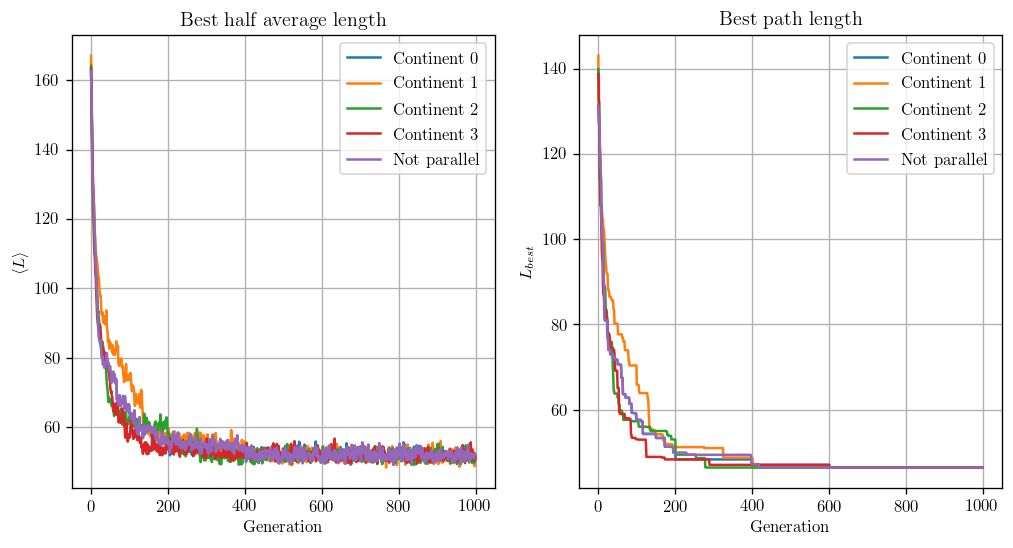

Best path continent 1:  46.3666
Best path continent 2:  46.3666
Best path continent 3:  46.3666
Best path continent 4:  46.3666
Best path non parallel:  46.3666


In [4]:
avg_path_length_0=np.loadtxt("Ex_10_2/Square/path_length.out0", delimiter=", ", dtype="float")
avg_path_length_1=np.loadtxt("Ex_10_2/Square/path_length.out1", delimiter=", ", dtype="float")
avg_path_length_2=np.loadtxt("Ex_10_2/Square/path_length.out2", delimiter=", ", dtype="float")
avg_path_length_3=np.loadtxt("Ex_10_2/Square/path_length.out3", delimiter=", ", dtype="float")
avg_path_length_old=np.loadtxt("Ex_10_2/SquareOld/path_length.out", delimiter=", ", dtype="float")

best_path_length_0=np.loadtxt("Ex_10_2/Square/best_length.out0", delimiter=", ", dtype="float")
best_path_length_1=np.loadtxt("Ex_10_2/Square/best_length.out1", delimiter=", ", dtype="float")
best_path_length_2=np.loadtxt("Ex_10_2/Square/best_length.out2", delimiter=", ", dtype="float")
best_path_length_3=np.loadtxt("Ex_10_2/Square/best_length.out3", delimiter=", ", dtype="float")
best_path_length_old=np.loadtxt("Ex_10_2/SquareOld/best_length.out", delimiter=", ", dtype="float")

x,y=np.loadtxt("Ex_10_2/Square/coordinates.out", delimiter=",",unpack=True)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5), dpi=120)

ax1.plot(avg_path_length_0,label="Continent 0")
ax1.plot(avg_path_length_1,label="Continent 1")
ax1.plot(avg_path_length_2, label="Continent 2")
ax1.plot(avg_path_length_3,label="Continent 3")
ax1.plot(avg_path_length_old,label="Not parallel")
ax1.legend()
ax1.set_title("Best half average length")
ax1.set_xlabel("Generation")
ax1.set_ylabel(r"$\langle L \rangle$")
ax1.grid()


ax2.plot(best_path_length_0,label="Continent 0")
ax2.plot(best_path_length_1,label="Continent 1")
ax2.plot(best_path_length_2,label="Continent 2")
ax2.plot(best_path_length_3,label="Continent 3")
ax2.plot(best_path_length_old,label="Not parallel")

ax2.legend()
ax2.set_title("Best path length")
ax2.set_xlabel("Generation")
ax2.set_ylabel(r"$L_{best}$")
ax2.grid()

plt.show()
print("Best path continent 1: ", best_path_length_0[-1])
print("Best path continent 2: ", best_path_length_1[-1])
print("Best path continent 3: ", best_path_length_2[-1])
print("Best path continent 4: ", best_path_length_3[-1])
print("Best path non parallel: ", best_path_length_old[-1])



In questo caso non sembra esserci una differenza significativa tra i due casi, perché molto probabilmente in entrambi i casi gli algoritmi sono riusciti ad arrivare alla soluzione ottimale. Questo non è quindi un buon modo per confrontare le performance dei due metodi. Ho provato allora a misurare il tempo di esecuzione con MPI_Wtime (sul mio computer, dual core):

* 1 nodo (no migrazioni): 0.088814
* 2 nodi (con migrazioni): 0.109848 (per il nodo più lento)
* 4 nodi (con migrazioni): 0.163790 (per il nodo più lento)

Si può notare che il tempo di esecuzione raddoppia passando tra 1 e 4 nodi, tuttavia le ricerche sono quadruplicate. Può essere interessante osservare cosa succede con un problema più complicato, ossia considerando più città (ne ho considerate 256). Ho considerato solo due nodi perché ho notato che, sulla mia macchina, utilizzarne 4 è meno vantaggioso. Infine, ho considerato $10000$ generazioni con migrazione ogni $500$. Tutti gli altri parametri sono rimasti inalterati.

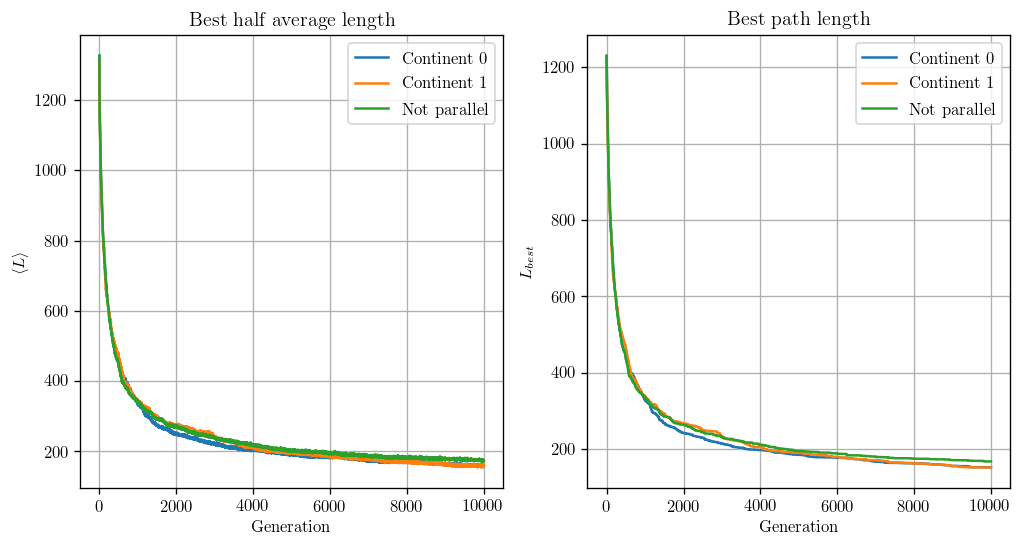

Best path continent 1:  151.793
Best path continent 2:  151.258
Best path non parallel:  167.256


In [5]:
avg_path_length_0=np.loadtxt("Ex_10_2/Square256/path_length.out0", delimiter=", ", dtype="float")
avg_path_length_1=np.loadtxt("Ex_10_2/Square256/path_length.out1", delimiter=", ", dtype="float")
avg_path_length_old=np.loadtxt("Ex_10_2/Square256/path_length_old.out", delimiter=", ", dtype="float")

best_path_length_0=np.loadtxt("Ex_10_2/Square256/best_length.out0", delimiter=", ", dtype="float")
best_path_length_1=np.loadtxt("Ex_10_2/Square256/best_length.out1", delimiter=", ", dtype="float")
best_path_length_old=np.loadtxt("Ex_10_2/Square256/best_length_old.out", delimiter=", ", dtype="float")


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5), dpi=120)

ax1.plot(avg_path_length_0,label="Continent 0")
ax1.plot(avg_path_length_1,label="Continent 1")
ax1.plot(avg_path_length_old,label="Not parallel")
ax1.legend()
ax1.set_title("Best half average length")
ax1.set_xlabel("Generation")
ax1.set_ylabel(r"$\langle L \rangle$")
ax1.grid()


ax2.plot(best_path_length_0,label="Continent 0")
ax2.plot(best_path_length_1,label="Continent 1")
ax2.plot(best_path_length_old,label="Not parallel")

ax2.legend()
ax2.set_title("Best path length")
ax2.set_xlabel("Generation")
ax2.set_ylabel(r"$L_{best}$")
ax2.grid()

plt.show()
print("Best path continent 1: ", best_path_length_0[-1])
print("Best path continent 2: ", best_path_length_1[-1])
print("Best path non parallel: ", best_path_length_old[-1])



I tempi di computazione sono risultati praticamente identici ($t=7.487499$ con due nodi e $t=7.298614$ con un solo nodo), ciononostante entrambe le soluzioni della ricerca parallela sono sensibilmente migliori rispetto a quella non parallela (circa del $10 \%$). Avendo a disposizione hardware adatto, le possibilità di miglioramento sono quindi notevoli: al prezzo di un minimo ritardo nelle performance, si possono ottenere significativi miglioramenti nella soluzione.

*NB: Nella realizzazione del programma ho avuto dei problemi utilizzando il tipo di dato "MPI_INTEGER" (come indicato a lezione), utilizzando invece "MPI_INT" il programma non dava errori.*